# **Import Library**
Import library Python yang diperlukan dalam mengerjakan modul praktikum pada bagian ini.

In [2]:
## code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#silahkan ditambahkan sesuai keperluan

# **Data Preparation**



## **Muat Data**
Unduh dataset yang digunakan dari kaggle dan muat menjadi dataframe menggunakan pandas.

Link Dataset:
- [Social Network Ads Dataset](https://www.kaggle.com/datasets/rakeshrau/social-network-ads)


In [48]:
# Lengkapi kode berikut
path = kagglehub.dataset_download("rakeshrau/social-network-ads")

print("Path to dataset files:", path)

df = pd.read_csv(f"{path}\\Social_Network_Ads.csv")

Path to dataset files: C:\Users\Arcleid\.cache\kagglehub\datasets\rakeshrau\social-network-ads\versions\1


In [49]:
# Tampilkan 5 baris pertama dengan function head.
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## **Exploratory Data Analysis**
Lakukan eksplorasi sederhana secara statistik pada dataset, beberapa fungsi yang krusial untuk digunakan:
* describe
* info
* correlation

Jelaskan hasil deskripsi data pada notebook!

In [50]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, dtype=int)
encoded = encoder.fit_transform(df[["Gender"]])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["Gender"]))
encoded_df.head()

df_encoded = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)
df_encoded.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,Male,19,19000,0,0,1
1,15810944,Male,35,20000,0,0,1
2,15668575,Female,26,43000,0,1,0
3,15603246,Female,27,57000,0,1,0
4,15804002,Male,19,76000,0,0,1


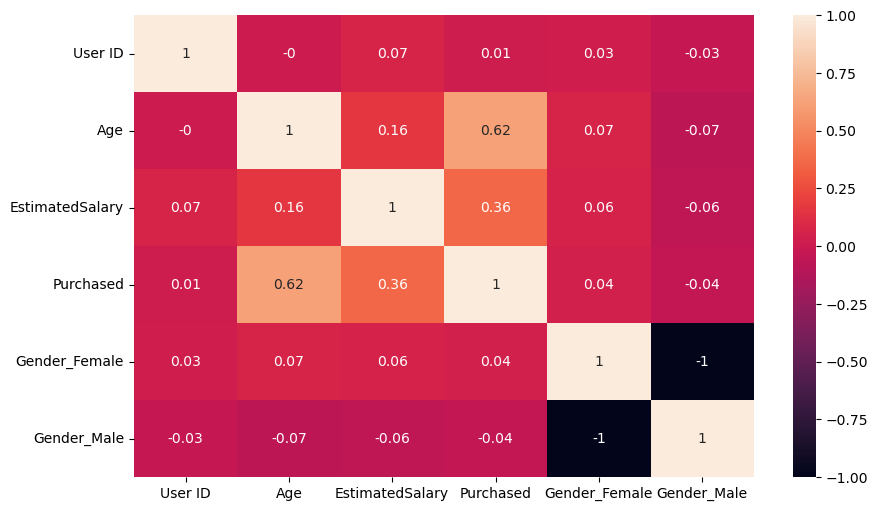

In [51]:
## Contoh correlation
df = df_encoded.drop("Gender", axis=1)

plt.figure(figsize=(10, 6))
sns.heatmap(round(df.corr(),2), annot = True)
plt.show()

### **Lakukan Minimal 2 Data Visualization**
Data Visualization digunakan untuk meningkatkan pemahaman anda terhadap fitur-fitur penting, identifikasi anomali, dan menentukan metode data cleaning yang tepat terhadap dataset. Jelaskan hasil data visualization pada notebook!

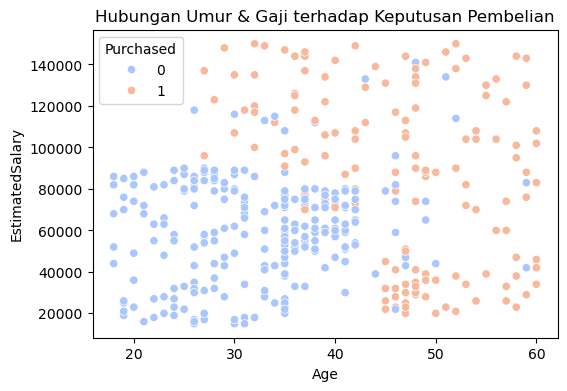

In [52]:
# Kode
plt.figure(figsize=(6,4))
sns.scatterplot(x="Age", y="EstimatedSalary", hue="Purchased", data=df, palette="coolwarm")
plt.title("Hubungan Umur & Gaji terhadap Keputusan Pembelian")
plt.show()

Berdasarkan visualisasi di atas, terlihat bahwa sebagian besar pengguna dengan rentang usia 20 hingga 40 tahun dan perkiraan gaji di bawah 10.000 cenderung tidak melakukan pembelian.
Sebaliknya, pada rentang usia 45 hingga 60 tahun, terdapat kecenderungan bahwa beberapa pengguna tetap melakukan pembelian meskipun memiliki gaji relatif rendah (<10.000).
Selain itu, pengguna dengan gaji di atas 10.000, khususnya pada usia 30 hingga 60 tahun, menunjukkan tingkat pembelian yang lebih tinggi secara konsisten.
Hal ini mengindikasikan bahwa umur dan gaji merupakan fitur yang cukup berpengaruh terhadap keputusan pembelian dalam dataset ini.

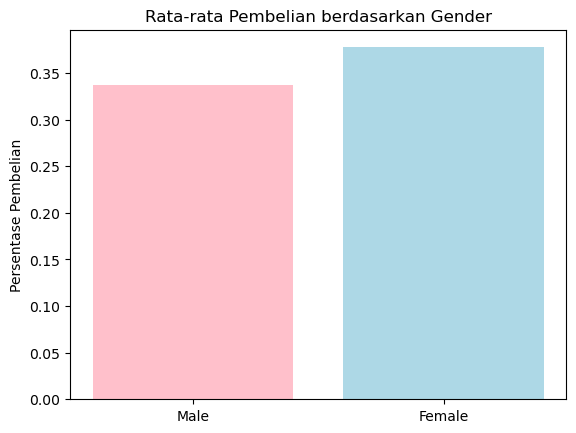

In [53]:
gender_purchase = df.groupby(["Gender_Female"])["Purchased"].mean().reset_index()
gender_purchase["Gender"] = gender_purchase["Gender_Female"].map({1: "Female", 0: "Male"})

plt.bar(gender_purchase["Gender"], gender_purchase["Purchased"], color=['pink', 'lightblue'])
plt.title("Rata-rata Pembelian berdasarkan Gender")
plt.ylabel("Persentase Pembelian")
plt.show()

Dari persentase data diatas, dapat dilihat juga bahwa Perempuan memiliki kecenderungan untuk melakukan pembelian daripada laki-laki dengan sedikit perbedaaan.

#  **Data Splitting**
Lakukan data splitting ke dalam tiga bagian, yakni data latih (training set), data validasi (validation set), dan data uji (test set).

In [54]:
# Gunakan fungsi `train_test_split()` dari scikit-learn 

df_train_val, df_test = train_test_split(df, test_size=0.2, random_state=7)
print(f"Train/Validation: {len(df_train_val)}, Test: {len(df_test)}")

df_train, df_val = train_test_split(df_train_val, test_size=0.25, random_state=7)
print(f"Train: {len(df_train)}, Validation: {len(df_val)}, Test: {len(df_test)}")

Train/Validation: 320, Test: 80
Train: 240, Validation: 80, Test: 80


# **Preprocessing**

Lakukan proses preprocessing yang dibutuhkan untuk menyiapkan data agar bisa diproses machine learning, seperti feature scaling, encoding, dll.

In [60]:
# Gunakan fungsi-fungsi yang disediakan scikit-learn untuk melakukan preprocessing data
# Buat instance Feature Scaling menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd

# --- Inisialisasi scaler ---
scaler = StandardScaler()

# --- Kolom numerik yang akan di-scale ---
numeric_columns = ['Age', 'EstimatedSalary']

# --- Fit scaler pada data train saja ---
df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])

# --- Transform pada data validasi dan test ---
df_val[numeric_columns] = scaler.transform(df_val[numeric_columns])
df_test[numeric_columns] = scaler.transform(df_test[numeric_columns])

# --- Pisahkan fitur dan target ---
X_train = df_train.drop(columns=['Purchased', 'User ID'])
y_train = df_train['Purchased']

X_val = df_val.drop(columns=['Purchased', 'User ID'])
y_val = df_val['Purchased']

X_test = df_test.drop(columns=['Purchased', 'User ID'])
y_test = df_test['Purchased']

# --- Verifikasi hasil scaling ---
print("Mean fitur numerik (seharusnya ~0):")
print(X_train[numeric_columns].mean().round(3))

print("\nStandard deviation fitur numerik (seharusnya ~1):")
print(X_train[numeric_columns].std().round(3))


Mean fitur numerik (seharusnya ~0):
Age               -0.0
EstimatedSalary    0.0
dtype: float64

Standard deviation fitur numerik (seharusnya ~1):
Age                1.002
EstimatedSalary    1.002
dtype: float64


# **Pemodelan**

Lakukan pelatihan model pada training set dengan evaluasi pada validation set. Gunakan kriteria berikut:
- Latih model KNN dan SVM **tanpa** hyperparamater tuning.
- Latih model KNN dan SVM **dengan** hyperparamater tuning.
- Evaluasi pelatihan model dengan minimal **empat metrik** yakni:
    - Akurasi
    - Precision
    - Recall
    - F1-Score
- Bandingkan performa model yang dilatih dan pilih salah satu model terbaik.
- Model yang dipilih wajib memiliki minimal akurasi sebesar **80%**

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        49
           1       0.86      0.97      0.91        31

    accuracy                           0.93        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



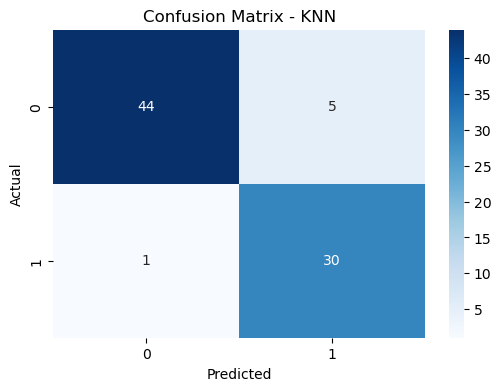

In [61]:
#KNN tanpa Hyperparameter Tuning

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_val)

print("KNN Classification Report:")
print(classification_report(y_val, y_pred_knn))

cm_knn = confusion_matrix(y_val, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        49
           1       0.85      0.90      0.88        31

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80



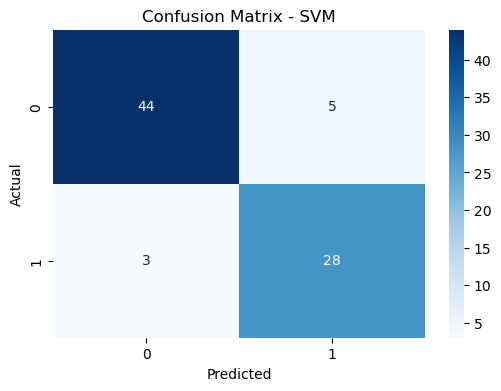

In [62]:
#SVM tanpa Hyperparameter Tuning
# Latih SVM pada training set
svm = SVC()
svm.fit(X_train, y_train)


# Evaluasi pada validation set
y_pred_svm = svm.predict(X_val)


# Evaluasi menggunakan classification report
print("SVM Classification Report:")
print(classification_report(y_val, y_pred_svm))


# Confusion Matrix
cm_svm = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [64]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n🔹 Evaluasi Model: {model_name}")
    print(f"Akurasi   : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Presisi   : {precision_score(y_true, y_pred):.4f}")
    print(f"Recall    : {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score  : {f1_score(y_true, y_pred):.4f}")

evaluate_model(y_test, y_pred_knn, "KNN (Default)")
evaluate_model(y_test, y_pred_svm, "SVM (Default)")


🔹 Evaluasi Model: KNN (Default)
Akurasi   : 0.5375
Presisi   : 0.3429
Recall    : 0.4615
F1-Score  : 0.3934

🔹 Evaluasi Model: SVM (Default)
Akurasi   : 0.5375
Presisi   : 0.3333
Recall    : 0.4231
F1-Score  : 0.3729


In [65]:
#KNN dengan Hyperparameter Tuning

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print("Best Parameters (KNN):", grid_knn.best_params_)
best_knn = grid_knn.best_estimator_

y_pred_knn_best = best_knn.predict(X_test)
evaluate_model(y_test, y_pred_knn_best, "KNN (Tuned)")


Best Parameters (KNN): {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}

🔹 Evaluasi Model: KNN (Tuned)
Akurasi   : 0.9375
Presisi   : 0.9200
Recall    : 0.8846
F1-Score  : 0.9020


In [66]:
#SVM dengan Hyperparameter Tuning
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

print("Best Parameters (SVM):", grid_svm.best_params_)
best_svm = grid_svm.best_estimator_

y_pred_svm_best = best_svm.predict(X_test)
evaluate_model(y_test, y_pred_svm_best, "SVM (Tuned)")

Best Parameters (SVM): {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

🔹 Evaluasi Model: SVM (Tuned)
Akurasi   : 0.9375
Presisi   : 0.8621
Recall    : 0.9615
F1-Score  : 0.9091


In [67]:
import pandas as pd

results = {
    'Model': ['KNN Default', 'SVM Default', 'KNN Tuned', 'SVM Tuned'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn_best),
        accuracy_score(y_test, y_pred_svm_best)
    ],
    'Precision': [
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_knn_best),
        precision_score(y_test, y_pred_svm_best)
    ],
    'Recall': [
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_knn_best),
        recall_score(y_test, y_pred_svm_best)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_knn_best),
        f1_score(y_test, y_pred_svm_best)
    ]
}

df_results = pd.DataFrame(results)
print(df_results)

         Model  Accuracy  Precision    Recall  F1-Score
0  KNN Default    0.5375   0.342857  0.461538  0.393443
1  SVM Default    0.5375   0.333333  0.423077  0.372881
2    KNN Tuned    0.9375   0.920000  0.884615  0.901961
3    SVM Tuned    0.9375   0.862069  0.961538  0.909091


# **Final Model**

Lakukan pelatihan ulang model akhir pada kombinasi training dan validation set, lalu evaluasi pada test set!

📊 FINAL MODEL EVALUATION (Test Set)
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        54
           1       0.86      0.92      0.89        26

    accuracy                           0.93        80
   macro avg       0.91      0.92      0.92        80
weighted avg       0.93      0.93      0.93        80



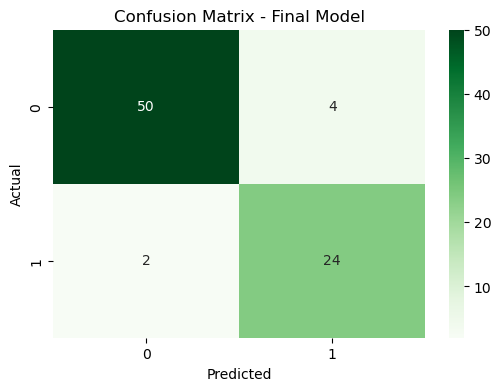

In [68]:
# Kode

X_final_train = pd.concat([X_train, X_val], axis=0)
y_final_train = pd.concat([y_train, y_val], axis=0)

final_model = best_svm

final_model.fit(X_final_train, y_final_train)

y_pred_test = final_model.predict(X_test)

print("FINAL MODEL EVALUATION (Test Set)")
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Final Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()